## Урок 5. Применение математической статистики для проверки гипотез в реальной жизни для популярных метрик

### Задача 1
1) Вы провели эксперимент c упрощением формы заказа в магазине Утконос и получили результаты по метрике конверсий в покупку. Выберите метод оценки и оцените есть ли стат.значимые различия между конверсиями в двух группах при **alpha = 5%**. Дайте краткие рекомендации команде.

Результаты: 

1) Число юзеров в группах , которые заходили на сайт в период эксперимента: n1 = 15550 и n2 = 15550 . 

2) Число юзеров в группах , которые совершили хотя бы одну покупку за период эксперимента: n1 = 164 и n2 = 228 

3) Конверсии : conv1 = 1.05% conv2 = 1.47% .

|          | Кол-во посетителей | Совершили покупку  | Конверсия|
|----------|--------------------|--------------------|----------|
| Версия А |           15 550   | 164                | 1.05     |
| Версия В |           15 550   | 228                | 1.47     |

#### Вариант №1 - ДОЛИ

**z-критерий для разности долей**


Нулевая гипотеза (H0) – между конверсией в группах нет статистически значимых различий

Альтернативная гипотеза (H1) – между конверсией в группах есть статистически значимые различия

| **Стандартная ошибка разности долей:** | **Z-статистика:**|
|--------------------------------|----------------------------|
| $$SE = \sqrt{\frac{conv_1*(1-conv_1)}{n_1} + \frac{conv_2*(1-conv_2)}{n_2}}$$ | $$z = \frac{(conv_1 - conv_2)}{SE} $$ |

In [1]:
cv1, cv2 = 1.05 / 100, 1.47/ 100
n1, n2 = 15550, 15550
SE = (cv1 *(1 - cv1) / n1 + cv2 *(1 - cv2) / n2)**0.5
z = (cv1 - cv2) / SE
print(f'SE  = {SE}')
print(f'Z-критерий  = {-z}')

SE  = 0.0012647498894873244
Z-критерий  = 3.32081468036538


**Ответ** Для alpha = 5% критическое значение z-статистики = 1.96. Полученное значение z-статистики сильно выше критического значения, что говорит о том, что **существует статистически значимая разница в конверсиях между группами.**

#### Вариант №2 - ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ


| Формула доверительного интервала | |
|------------------|----------------------|
| $$ \hat{p} ± Z * SE$$ | $$(p_2 - p_1) ± 1.96 * \sqrt{\frac{\hat{p}*(1-\hat{p})}{n}}$$ |

In [2]:
lim_L = (cv2 - cv1) - 1.96 * SE
lim_R = (cv2 - cv1) + 1.96 * SE
print(f"Доверительный интервал [{lim_L} ; {lim_R}]")


Доверительный интервал [0.0017210902166048432 ; 0.0066789097833951545]


**Ответ** Ддоверительный интервал не содержит **ноль**, результаты являются статистически **значимыми**, и мы можем сделать вывод, что группа с упрощенной формой заказа показала **более высокую** конверсию в покупку, чем контрольная группа.

#### Вариант №3 - ХИ-КВАДРАТ

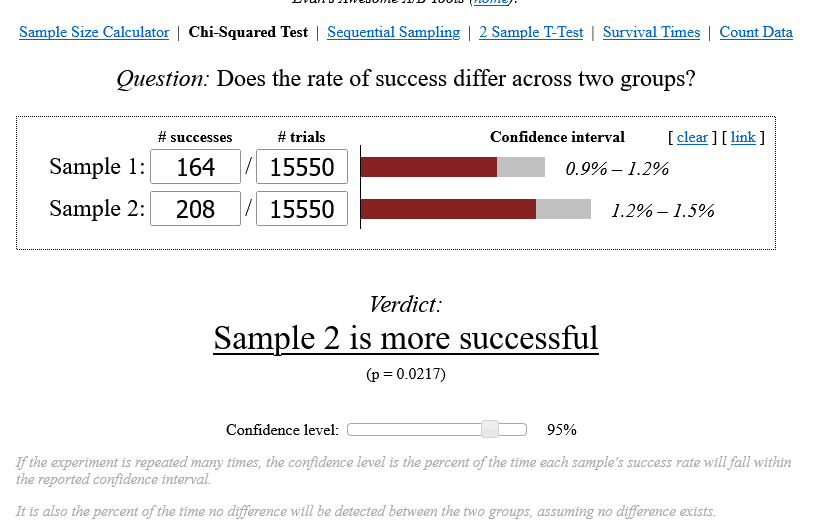

**Рекомендация команде:** 

- Группа с упрощенной формой заказа показала более высокую конверсию в покупку, чем контрольная группа. 
- Рекомендуется провести более глубокий анализ данных перед принятием окончательного решения о внедрении новой формы заказа.

### Задача 2

Сравниваем метрику **конверсия** в **покупку**. Размер выборки - 10000 элементов в каждой группе. Какой статистический критерий тут лучше всего подойдёт и почему ?

**Стандартизированная оценка** (z-оценка, англ. : Standard score, z-score) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, **сколько стандартных отклонений** составляет его разброс относительного среднего значения. 

Это безразмерный статистический показатель, используемый для сравнения значений разной размерности или шкалой измерений. 
Большинство статистических методов основываются на предположении о **нормальности** распределения данных, поэтому применение z-оценок совместно с  трансформацией к нормальности значительно расширяет возможности для дальнейшего анализа и исследований. 

Абсолютное значение z представляет собой оценку (в единицах стандартного отклонения) расстояния между x и его средним значением μ в общей совокупности. Если z меньше нуля, то x ниже средней, если z больше нуля, то x расположен выше средней μ. 

Z оценка также подходит для больших выборок, следовательно в случае двух симметричных выборок для оценки значимости критерий z отлично подойдет.